In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data from the csv file for preprocessing
cervical_cancer_data = pd.read_csv("../datasets/risk_factors_cervical_cancer.csv")

#from the csv we observe that empty values are represented by ?, we replace each with NaN
cervical_cancer_data.replace("?",np.nan,inplace=True)

#Then we find the number of missing values for each column and their percentage
missing_values = cervical_cancer_data.isnull().sum()
percent_missing = (missing_values/len(cervical_cancer_data))*100
summary = pd.DataFrame({'#Missing Values': missing_values,'Percentage': percent_missing})
print("Summary of missing values:")
print(summary)

Summary of missing values:
                                    #Missing Values  Percentage
Age                                               0    0.000000
Number of sexual partners                        26    3.030303
First sexual intercourse                          7    0.815851
Num of pregnancies                               56    6.526807
Smokes                                           13    1.515152
Smokes (years)                                   13    1.515152
Smokes (packs/year)                              13    1.515152
Hormonal Contraceptives                         108   12.587413
Hormonal Contraceptives (years)                 108   12.587413
IUD                                             117   13.636364
IUD (years)                                     117   13.636364
STDs                                            105   12.237762
STDs (number)                                   105   12.237762
STDs:condylomatosis                             105   12.237762
STDs:cervical

In [3]:
# We will remove STDs:Time since first diagnosis and STDs:Time since last diagnosis since
# they have too many empty values
# In this dataset we have four target variables,Hinselmann,schiller,Citology and Biopsy
# We are going to use Biopsy as it is more reliable as our target for presence/absence of cancer
# we will eliminate the other three as our application wont use diagnosis, it suggests only if 
# one is to go for tests
# We will also remove the columns Dx:Cancer, Dx:CIN, Dx:HPV, and Dx as they also require diagnosis
# We will remove STDs:AIDS as we have a column for HIV and it comes before AIDS
cervical_cancer_data.drop(columns=["Citology","Schiller","Hinselmann","Dx","Dx:HPV","Dx:CIN","Dx:Cancer","STDs:AIDS",
                                  "STDs: Time since last diagnosis","STDs: Time since first diagnosis"],
                                     inplace=True)

In [4]:
#We then fill the remaining empty values for numerical data using median and for categorical data using mode
#Then we convert all data to numeric for use in ML models training and we also remove duplicates
numerical_columns = cervical_cancer_data.select_dtypes(include=np.number).columns
categorical_columns = cervical_cancer_data.select_dtypes(include='object').columns

# Filling missing values in numeric variables with the column's median
for column in numerical_columns:
    median_value = cervical_cancer_data[column].median()
    cervical_cancer_data.loc[:, column] = cervical_cancer_data[column].fillna(median_value)

# Filling missing values in categorical variables with the column's mode
for column in categorical_columns:
    mode_value = cervical_cancer_data[column].mode()[0]
    cervical_cancer_data.loc[:, column] = cervical_cancer_data[column].fillna(mode_value)

# Convert all data to numeric values
cervical_cancer_data = cervical_cancer_data.apply(pd.to_numeric)

# Finally remove Duplicates from the dataset so that each datapoint is Unique
cervical_cancer_data.drop_duplicates(inplace=True)
cervical_cancer_data.reset_index(drop=True, inplace=True)

#print info for the dataset
cervical_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 827 non-null    int64  
 1   Number of sexual partners           827 non-null    float64
 2   First sexual intercourse            827 non-null    float64
 3   Num of pregnancies                  827 non-null    float64
 4   Smokes                              827 non-null    float64
 5   Smokes (years)                      827 non-null    float64
 6   Smokes (packs/year)                 827 non-null    float64
 7   Hormonal Contraceptives             827 non-null    float64
 8   Hormonal Contraceptives (years)     827 non-null    float64
 9   IUD                                 827 non-null    float64
 10  IUD (years)                         827 non-null    float64
 11  STDs                                827 non-n

In [5]:
# We begin analysing our data, first we use Describe
cervical_cancer_data.describe()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Biopsy
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,...,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,27.112455,2.544135,17.015719,2.227328,0.148730,1.246269,0.463007,0.698912,2.038373,0.100363,...,0.051995,0.021765,0.001209,0.001209,0.001209,0.021765,0.001209,0.002418,0.090689,0.065296
std,8.473041,1.658911,2.820883,1.446069,0.356038,4.129321,2.249724,0.459009,3.644173,0.300665,...,0.222152,0.146005,0.034773,0.034773,0.034773,0.146005,0.034773,0.049147,0.307687,0.247197
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


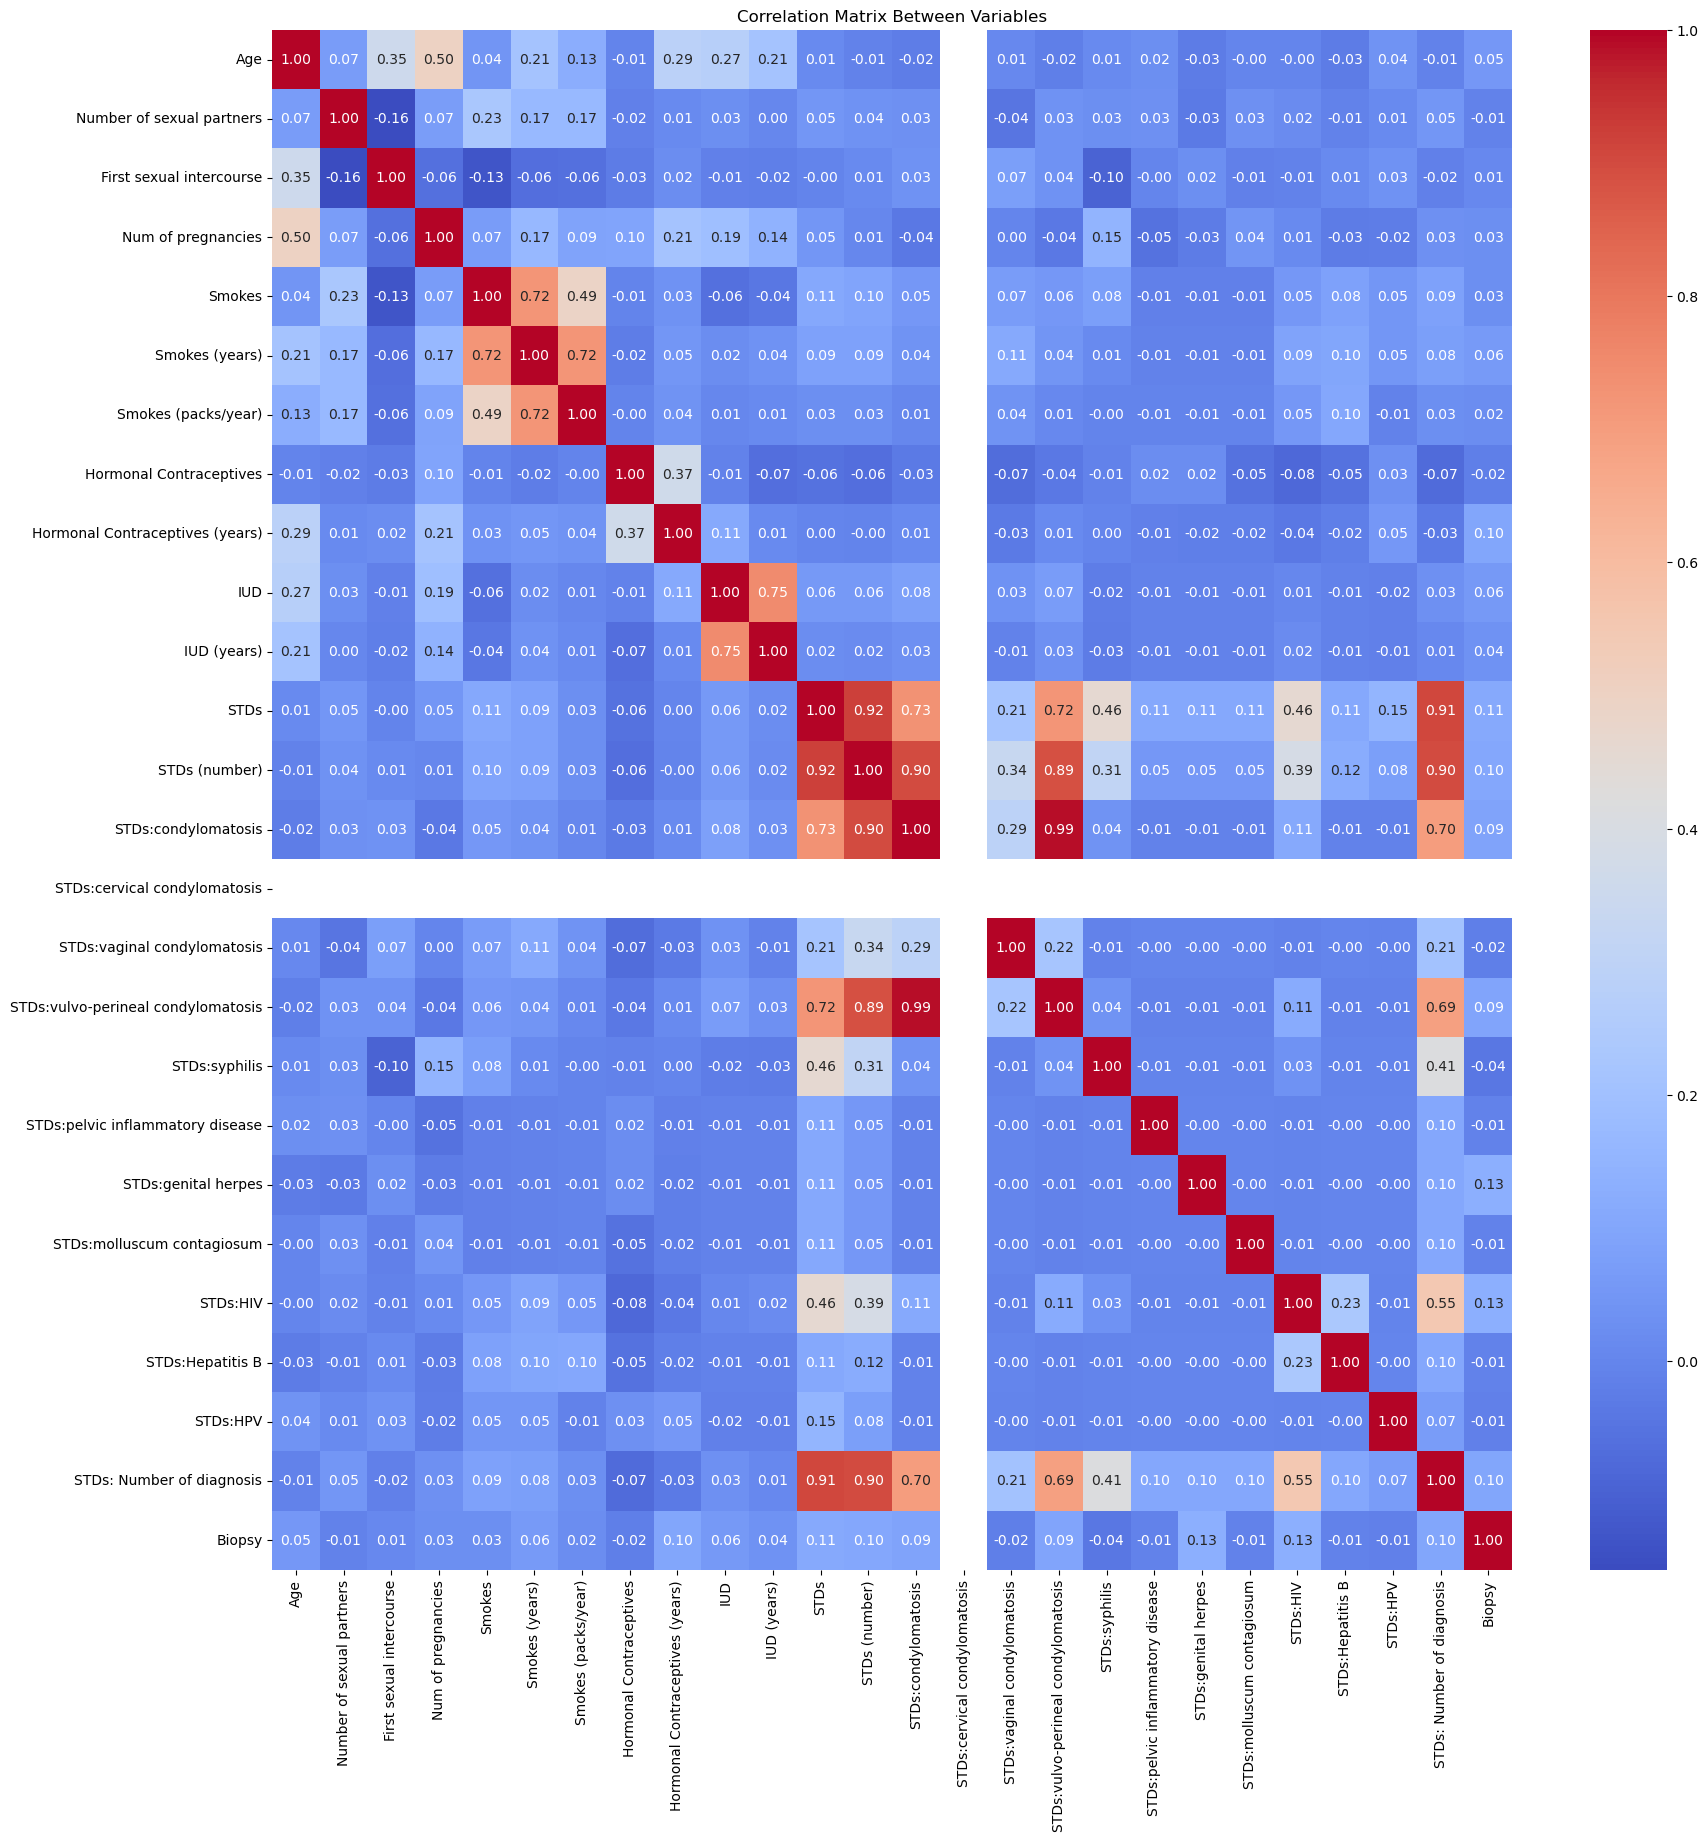

In [6]:
# From the data we can see the feature age has a large standard deviation, we may need to check for outliers

# Next we check for correlation between features using correlation Matrix

correlation_matrix = cervical_cancer_data.corr()

# We visualize the correlation matrix 
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Between Variables")
plt.show()

In [7]:
#STDs:Cervical condylomatosis has constant values of 0, we are going to remove it
cervical_cancer_data.drop(columns=["STDs:cervical condylomatosis"], inplace=True)

# This matrix shows the correlation or influence between all features in the dataset. 
# Values closest to 1 (red) indicate almost perfect correlation, 
# values closest to 0 (blue) indicate almost no correlation, and negative values 
# (darkest) indicate inverse correlation.

# As we can see, there is a diagonal strip of values that are colored red and appear to be 
# perfectly correlated, because the same features are aligned on the x and y axes, and the same 
# features are perfectly correlated with each other.

# Age and number of pregnancies are related, with older women having more pregnancies on average.

# There is also a high correlation between cigarettes, cigarettes (year) and cigarettes (packs/year), 
# as long-term smokers also smoke more packs per year.

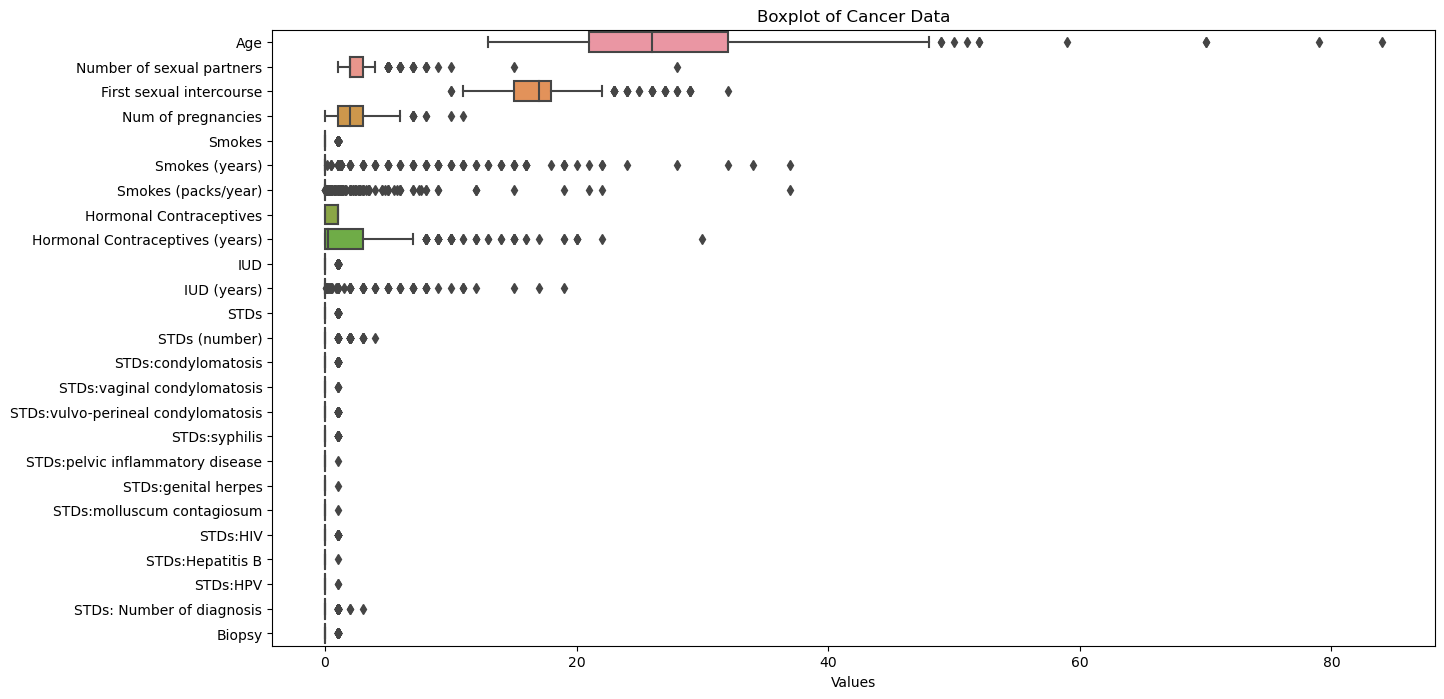

In [8]:
#Let's check for outliers with #box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=cervical_cancer_data, orient="h")
plt.title("Boxplot of Cancer Data")
plt.xlabel("Values")
plt.show()

In [9]:
#function to detect outliers
def detect_outliers(df, columns, method='zscore', threshold=3):
    outliers = {}
    for column in columns:
        if method == 'zscore':
            z_scores = (df[column] - df[column].mean()) / df[column].std()
            outliers[column] = df[(z_scores > threshold) | (z_scores < -threshold)][column]
        elif method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Check column names
print("Available columns:", cervical_cancer_data.columns)
numerical_columns = cervical_cancer_data.select_dtypes(include=np.number).columns
# Detect outliers
outliers = detect_outliers(cervical_cancer_data, numerical_columns, method='zscore', threshold=3)
print("\n")
print(outliers)

Available columns: Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Biopsy'],
      dtype='object')


{'Age': 625    59
640    79
641    84
649    70
655    70
Name: Age, dtype: int64, 'Number of sexual partners': 185    15.0
189     8.0
192    10.0
256     8.0
449    28.0
773     8.0
806     9.0
813     8.0
Name: Number of sexual partners, dtype: float64, 'First sexual intercourse': 7      26.0
10     26.0
19     27.0
29     26.0
74     27.0
79     27.0
88     32.0
92  

In [10]:
def replace_outliers_iqr(df, column):

    # First quartile value (Q1) and third quartile value (Q3) are calculated
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Interquartile range (IQR) is calculated
    IQR = Q3 - Q1

    # Lower and upper limits are determined
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers are pulled up to these limits
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df[column]

# removing outliers for age and Number of diagnosis
cervical_cancer_data['Age'] = replace_outliers_iqr(cervical_cancer_data, 'Age')
cervical_cancer_data['STDs: Number of diagnosis'] = replace_outliers_iqr(cervical_cancer_data,'STDs: Number of diagnosis')
cervical_cancer_data['Number of sexual partners'] = replace_outliers_iqr(cervical_cancer_data,'Number of sexual partners')
cervical_cancer_data['First sexual intercourse'] = replace_outliers_iqr(cervical_cancer_data,'First sexual intercourse')

In [11]:
cervical_cancer_data.to_csv('../datasets/cleaned_cervical_cancer_data.csv', index=False)